<a href="https://colab.research.google.com/github/Neerajmn28/100-Days-of-Python/blob/main/Task%201%20Data%20Analytics%20in%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### OVERVIEW: I have been assigned to conduct exploratory data analysis (EDA) on a dataset that contains housing data from Paris as a data scientist for a major European real estate company. This analysis will concentrate on the total square footage, price, number of floors, and number of bedrooms. Finding patterns and connections that can help forecast the housing market in the future is the aim.

## Import the Dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/Paris_housing_Data_Set_2 [4050] - COM7024 - [4050].csv')
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
19994,260000.0,3.0,2.25,1489.0,2800.0,2.0,3.0,7,2011.0,0,1584.0
19995,279000.0,5.0,2.50,2690.0,5557.0,2.0,3.0,7,2012.0,0,2090.0
19996,380000.0,3.0,2.25,1530.0,1305.0,2.0,3.0,7,2007.0,0,1320.0
19997,287000.0,3.0,2.50,1600.0,6315.0,2.0,3.0,8,2013.0,0,1608.0
19998,377000.0,2.0,1.50,1000.0,1251.0,2.0,3.0,7,2006.0,0,1420.0


In [4]:
summary_df = {
    'Number of records': df.shape[0],
    'Number of columns': df.shape[1],
    'Missing values': df.isnull().sum(),
}

print('Number of records:', summary_df['Number of records'])
print('Number of columns:', summary_df['Number of columns'])
print('Missing values:')
for key, value in summary_df['Missing values'].items():
  print(f' {key}: {value}')

Number of records: 19999
Number of columns: 11
Missing values:
 price: 4
 bedrooms: 15
 bathrooms: 11
 sqft_living: 1
 sqft_total: 5
 floors: 0
 condition: 1
 grade: 0
 built: 1
 renovated: 0
 living_area_sqft: 6


Checking Datatypes

In [5]:
df.dtypes

,0
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,float64
sqft_total,float64
floors,float64
condition,float64
grade,int64
built,float64
renovated,int64


## Data Cleaning

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,1.999500e+04,19984.000000,19988.000000,19998.000000,1.999400e+04,19999.000000,19998.000000,19999.000000,19998.000000,19999.000000,19993.000000
mean,5.353944e+05,3.366593,2.072969,2057.936294,1.560696e+04,1.444872,3.441794,7.605730,1967.953145,90.812041,1974.197819
std,3.659217e+05,0.930136,0.761162,905.640821,4.177576e+04,0.516672,0.665473,1.172624,28.317403,415.947901,675.199588
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,1900.000000,0.000000,399.000000
25%,3.170000e+05,3.000000,1.500000,1420.000000,5.350000e+03,1.000000,3.000000,7.000000,1950.000000,0.000000,1490.000000
50%,4.499000e+05,3.000000,2.000000,1900.000000,7.817500e+03,1.000000,3.000000,7.000000,1969.000000,0.000000,1830.000000
75%,6.400000e+05,4.000000,2.500000,2510.000000,1.100000e+04,2.000000,4.000000,8.000000,1991.000000,0.000000,2336.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000,2015.000000,6210.000000


The describe() function is to undersatnd the summary of the dataset, including count, mean, standard deviation, min, max, and quartiles for numeric columns.

#### Null Values

Filling null values with mean imputation.



In [7]:
null_list = ['price','bedrooms','bathrooms','sqft_living','sqft_total','condition','built','living_area_sqft']
for column in null_list:
  df[column] = df[column].fillna(df[column].mean())

In [8]:
df.isnull().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_total,0
floors,0
condition,0
grade,0
built,0
renovated,0


#### Data type conversion

In [9]:
for column in df.columns:
  if df[column].dtype == 'float64':
    print(f'Column {column} is of type float64')

Column price is of type float64
Column bedrooms is of type float64
Column bathrooms is of type float64
Column sqft_living is of type float64
Column sqft_total is of type float64
Column floors is of type float64
Column condition is of type float64
Column built is of type float64
Column living_area_sqft is of type float64


In [10]:
df.dtypes

,0
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,float64
sqft_total,float64
floors,float64
condition,float64
grade,int64
built,float64
renovated,int64


In [11]:
data_type_conversion = ['bathrooms','bedrooms','floors','built']

In [12]:
for column in data_type_conversion:
  df[column] = df[column].astype('int64')

In [13]:
df.dtypes

,0
price,float64
bedrooms,int64
bathrooms,int64
sqft_living,float64
sqft_total,float64
floors,int64
condition,float64
grade,int64
built,int64
renovated,int64


In [14]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,1.999900e+04,19999.000000,19999.000000,19999.000000,1.999900e+04,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,5.353944e+05,3.366318,1.713186,2057.936294,1.560696e+04,1.394020,3.441794,7.605730,1967.953098,90.812041,1974.197819
std,3.658851e+05,0.929841,0.724151,905.618177,4.177054e+04,0.526388,0.665456,1.172624,28.316696,415.947901,675.098290
min,7.500000e+04,1.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,1900.000000,0.000000,399.000000
25%,3.170000e+05,3.000000,1.000000,1420.000000,5.350000e+03,1.000000,3.000000,7.000000,1950.000000,0.000000,1490.000000
50%,4.499500e+05,3.000000,2.000000,1900.000000,7.819000e+03,1.000000,3.000000,7.000000,1969.000000,0.000000,1830.000000
75%,6.400000e+05,4.000000,2.000000,2510.000000,1.101450e+04,2.000000,4.000000,8.000000,1991.000000,0.000000,2331.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,5.000000,13.000000,2015.000000,2015.000000,6210.000000


#### Removing duplicate Vales

In [15]:
df.duplicated().value_counts()

,count
False,19995
True,4


In [16]:
df.drop_duplicates(inplace = True)
print(df.duplicated().sum())

0


#### EDA (Exploratory data analysis)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,221900.0,3,1,1180.0,5650.0,1,3.0,7,1955,0,1340.0
1,538000.0,3,2,2570.0,7242.0,2,3.0,7,1951,1991,1690.0
2,180000.0,2,1,770.0,10000.0,1,3.0,6,1933,0,2720.0
3,604000.0,4,3,1960.0,5000.0,1,5.0,7,1965,0,1360.0
4,510000.0,3,2,1680.0,8080.0,1,3.0,8,1987,0,1800.0


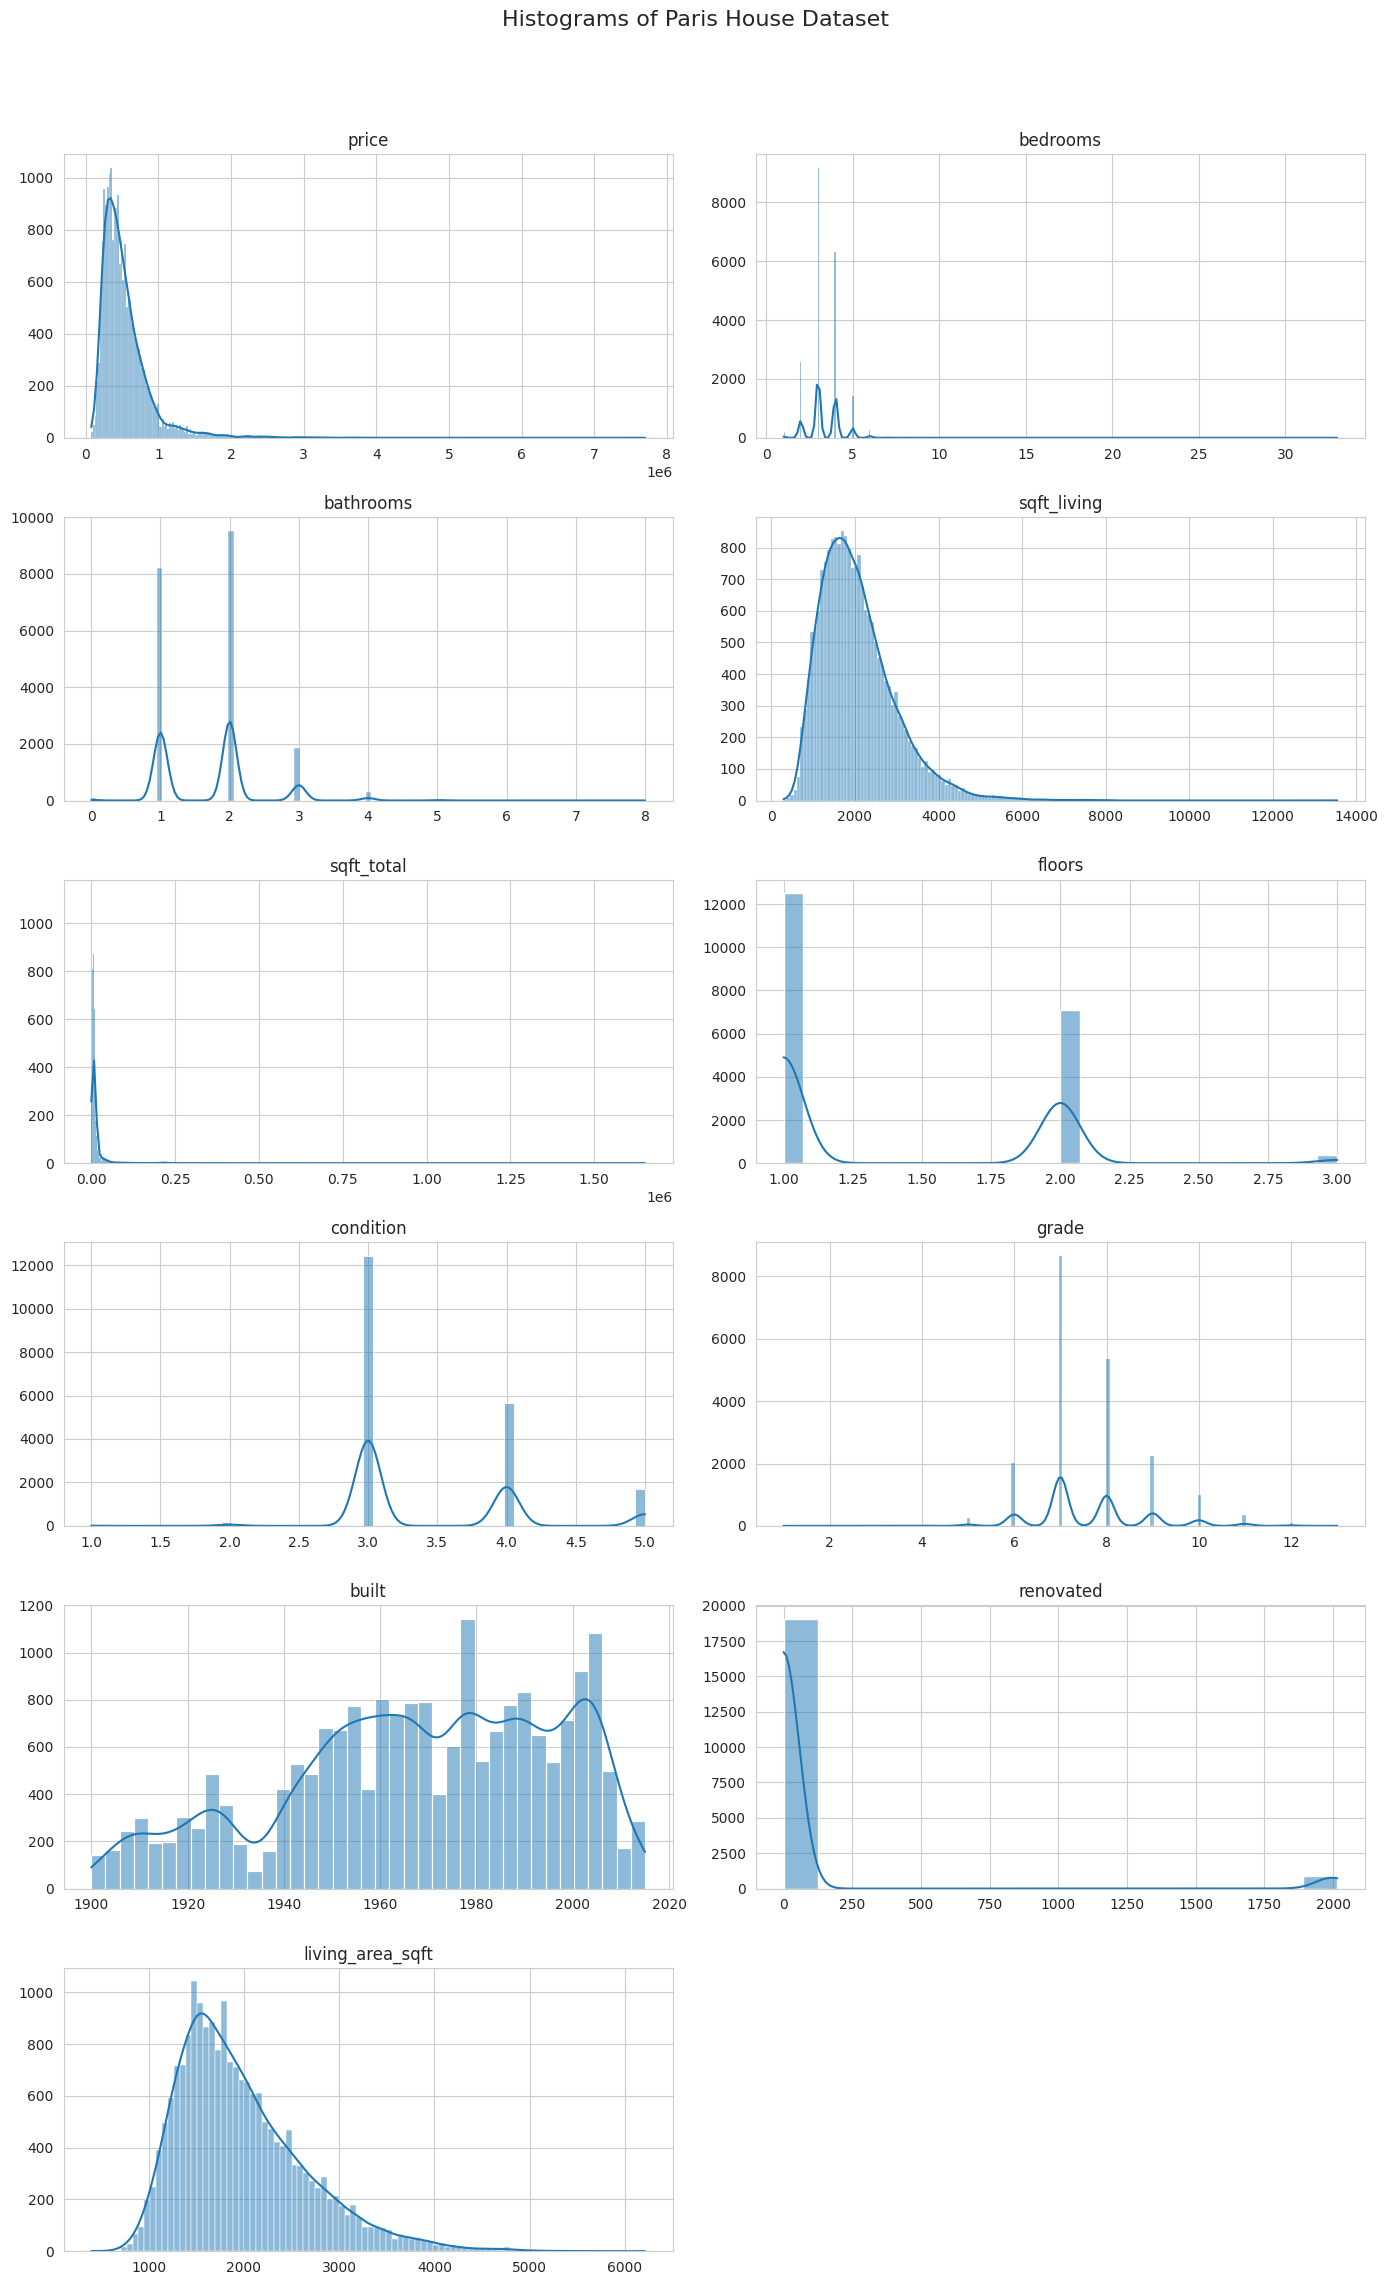

In [19]:
# Set the style of the plots
sns.set_style('whitegrid')
# Get the column names and number of columns
cols = df.columns
n = len(cols)
# Calculate the number of rows dynamically based on the number of columns
rows = (n + 1) // 2
# Create subplots with adjusted size
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(14, 24))
axes = axes.flatten()  # Flatten the 2D axes array into 1D for easier access
fig.suptitle('Histograms of Paris House Dataset', fontsize=16)

# Loop through each column and plot the histograms
for item, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[item])
    axes[item].set_title(col)
    axes[item].set_xlabel('')
    axes[item].set_ylabel('')

# Remove any unused subplots
for j in range(item + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Feature Engineering

In [20]:
data_skew = df.describe().T
data_skew['Skewness'] = df.skew(numeric_only=True)
print(data_skew)

                    count           mean            std      min       25%  \
price             19995.0  535400.239391  365915.676841  75000.0  317000.0   
bedrooms          19995.0       3.366392       0.929866      1.0       3.0   
bathrooms         19995.0       1.713178       0.724197      0.0       1.0   
sqft_living       19995.0    2057.975391     905.672958    290.0    1420.0   
sqft_total        19995.0   15609.284810   41774.370232    520.0    5350.0   
floors            19995.0       1.393898       0.526370      1.0       1.0   
condition         19995.0       3.441833       0.665489      1.0       3.0   
grade             19995.0       7.605501       1.172613      1.0       7.0   
built             19995.0    1967.948737      28.314373   1900.0    1950.0   
renovated         19995.0      90.731183     415.773400      0.0       0.0   
living_area_sqft  19995.0    1974.218164     675.115892    399.0    1490.0   

                       50%       75%        max   Skewness  
pr

Log Transformation to solve skewness.

In [21]:
model_data = df.copy()
model_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,221900.0,3,1,1180.0,5650.0,1,3.0,7,1955,0,1340.0
1,538000.0,3,2,2570.0,7242.0,2,3.0,7,1951,1991,1690.0
2,180000.0,2,1,770.0,10000.0,1,3.0,6,1933,0,2720.0
3,604000.0,4,3,1960.0,5000.0,1,5.0,7,1965,0,1360.0
4,510000.0,3,2,1680.0,8080.0,1,3.0,8,1987,0,1800.0


In [22]:
skewed_features = ['price','bedrooms','bathrooms','sqft_living','sqft_total','floors','condition','grade','built','renovated','living_area_sqft']

In [23]:
log_df = pd.DataFrame()
for feature in skewed_features:
  log_df[feature + '_log'] = np.log1p(df[feature])

In [24]:
log_df.head()

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_total_log,floors_log,condition_log,grade_log,built_log,renovated_log,living_area_sqft_log
0,12.309987,1.386294,0.693147,7.074117,8.639588,0.693147,1.386294,2.079442,7.578657,0.000000,7.201171
1,13.195616,1.386294,1.098612,7.852050,8.887791,1.098612,1.386294,2.079442,7.576610,7.596894,7.433075
2,12.100718,1.098612,0.693147,6.647688,9.210440,0.693147,1.386294,1.945910,7.567346,0.000000,7.908755
3,13.311331,1.609438,1.386294,7.581210,8.517393,0.693147,1.791759,2.079442,7.583756,0.000000,7.215975
4,13.142168,1.386294,1.098612,7.427144,8.997271,0.693147,1.386294,2.197225,7.594884,0.000000,7.496097


In [25]:
model_data = log_df

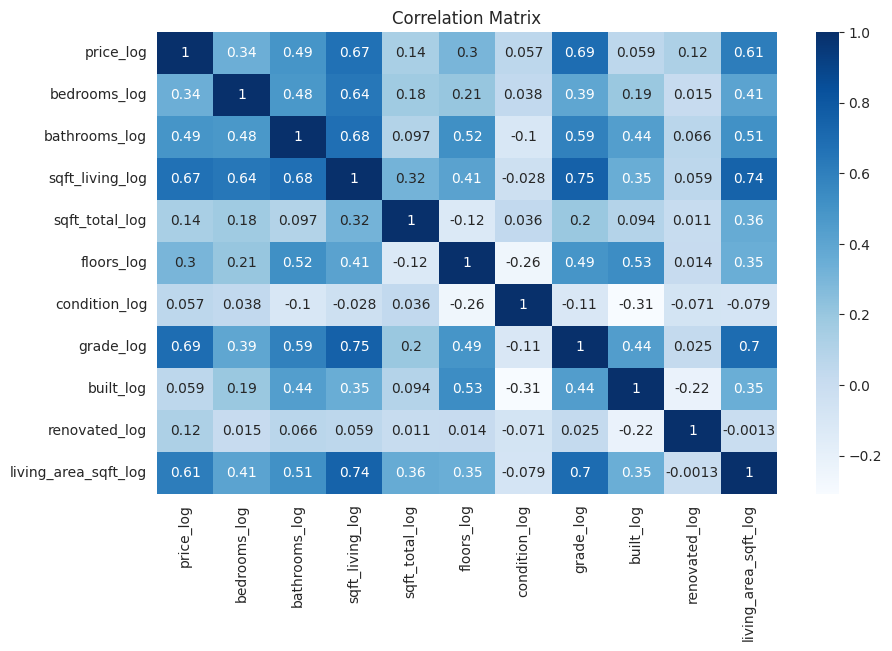

In [26]:
df_correlation = model_data.corr()

# plotting the correlation matrix

plt.figure(figsize=(10,6))
sns.heatmap(df_correlation, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [27]:
model_data.drop('renovated_log', axis = 1, inplace = True)
model_data['build_log'] = np.log1p(df['built'])
model_data.head()

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_total_log,floors_log,condition_log,grade_log,built_log,living_area_sqft_log,build_log
0,12.309987,1.386294,0.693147,7.074117,8.639588,0.693147,1.386294,2.079442,7.578657,7.201171,7.578657
1,13.195616,1.386294,1.098612,7.852050,8.887791,1.098612,1.386294,2.079442,7.576610,7.433075,7.576610
2,12.100718,1.098612,0.693147,6.647688,9.210440,0.693147,1.386294,1.945910,7.567346,7.908755,7.567346
3,13.311331,1.609438,1.386294,7.581210,8.517393,0.693147,1.791759,2.079442,7.583756,7.215975,7.583756
4,13.142168,1.386294,1.098612,7.427144,8.997271,0.693147,1.386294,2.197225,7.594884,7.496097,7.594884


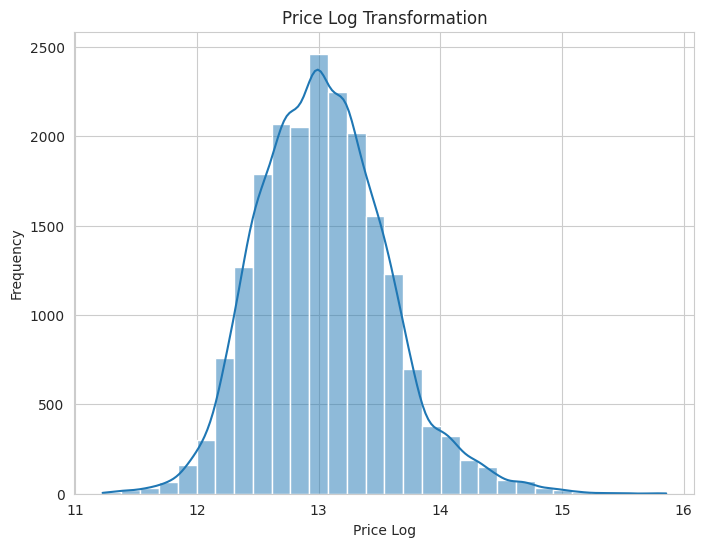

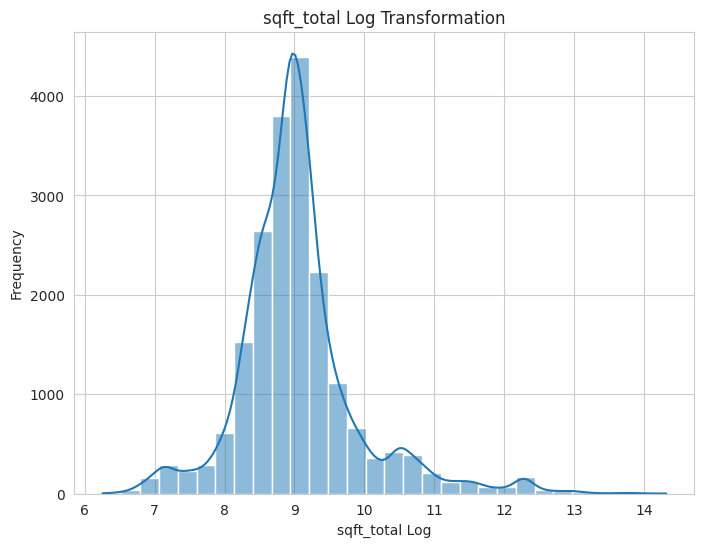

In [28]:
# Plot the price, sqft_transformtion, renovated
plt.figure(figsize=(8,6))
sns.histplot(model_data['price_log'], kde = True, bins = 30)
plt.title('Price Log Transformation')
plt.xlabel('Price Log')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(model_data['sqft_total_log'], kde = True, bins = 30)
plt.title('sqft_total Log Transformation')
plt.xlabel('sqft_total Log')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='floors', ylabel='price'>

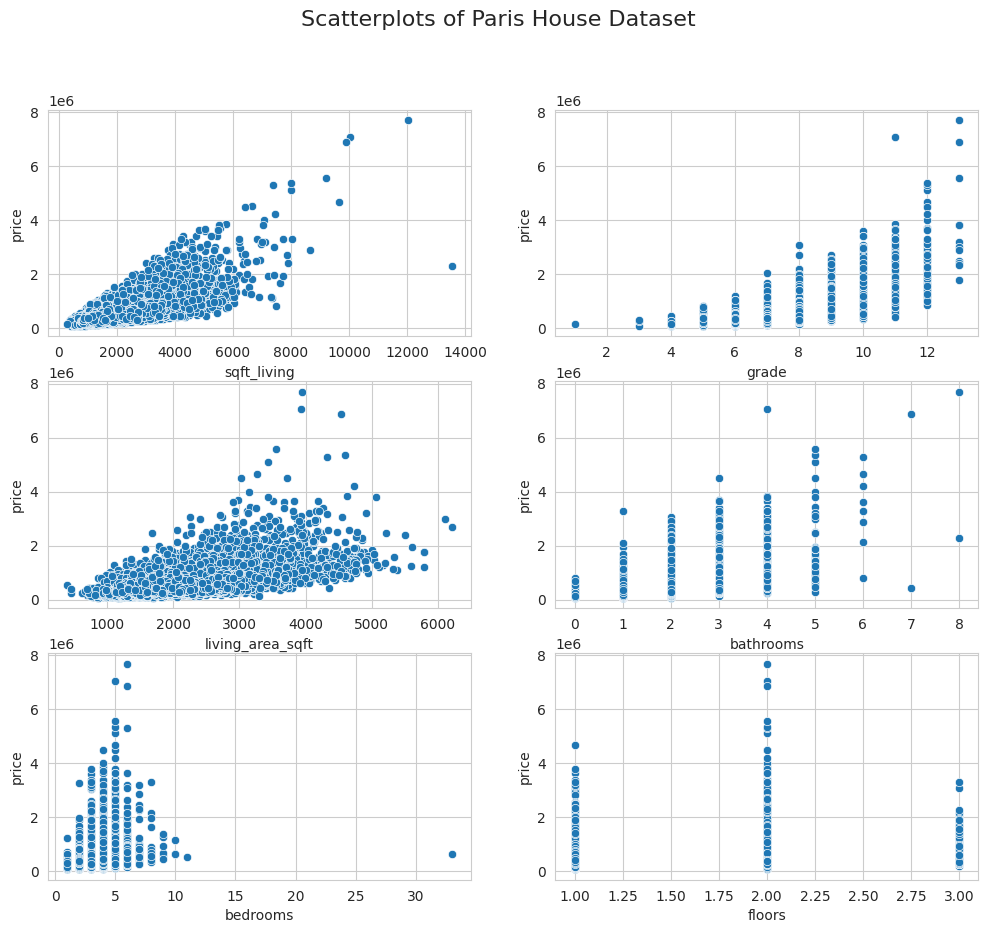

In [29]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
fig.suptitle('Scatterplots of Paris House Dataset', fontsize = 16)


# Scatter Plot for each Variable
sns.scatterplot(data = df, x = 'sqft_living', y = 'price', ax = axes[0,0])
sns.scatterplot(data = df, x = 'grade', y = 'price', ax = axes[0,1])
sns.scatterplot(data = df, x = 'living_area_sqft', y = 'price', ax = axes[1,0])
sns.scatterplot(data = df, x = 'bathrooms', y = 'price', ax = axes[1,1])
sns.scatterplot(data = df, x = 'bedrooms', y = 'price', ax = axes[2,0])
sns.scatterplot(data = df, x = 'floors', y = 'price', ax = axes[2,1])

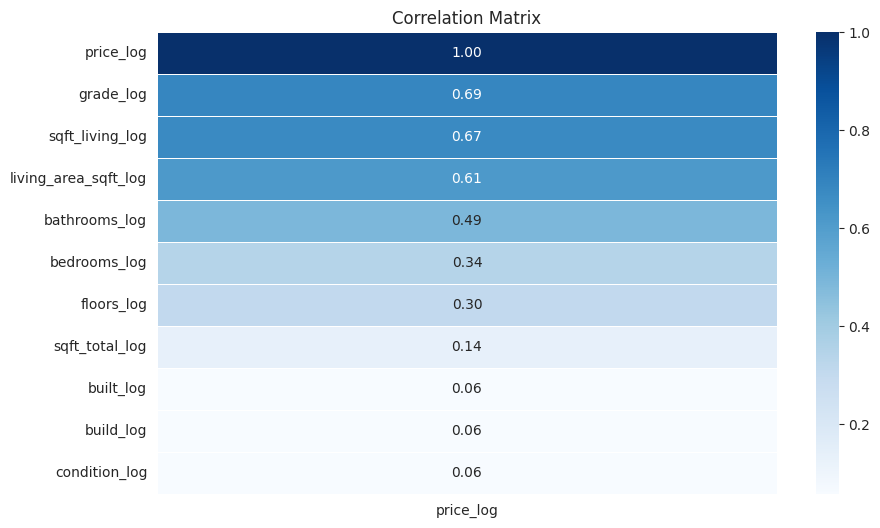

In [30]:
corr_matrix = model_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['price_log']].sort_values(by = 'price_log', ascending = False),
            annot = True, cmap = 'Blues',linewidths = 0.5, fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()


## MODEL BUILDING

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [32]:
model_data.head()

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_total_log,floors_log,condition_log,grade_log,built_log,living_area_sqft_log,build_log
0,12.309987,1.386294,0.693147,7.074117,8.639588,0.693147,1.386294,2.079442,7.578657,7.201171,7.578657
1,13.195616,1.386294,1.098612,7.852050,8.887791,1.098612,1.386294,2.079442,7.576610,7.433075,7.576610
2,12.100718,1.098612,0.693147,6.647688,9.210440,0.693147,1.386294,1.945910,7.567346,7.908755,7.567346
3,13.311331,1.609438,1.386294,7.581210,8.517393,0.693147,1.791759,2.079442,7.583756,7.215975,7.583756
4,13.142168,1.386294,1.098612,7.427144,8.997271,0.693147,1.386294,2.197225,7.594884,7.496097,7.594884


In [33]:
# Feature and target
X = model_data.drop(['price_log'],axis = 1)
y = model_data['price_log']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_log_linreg = lin_reg.predict(X_test_scaled)
y_pred_linreg = np.expm1(y_pred_log_linreg)
y_test_actual = np.expm1(y_test)

# Evaluation
mse_linreg = mean_squared_error(y_test_actual, y_pred_linreg)
r2_linreg = r2_score(y_test_actual, y_pred_linreg)

print("\n--- Linear Regression ---")
print(f"MSE: {mse_linreg:.2f}")
print(f"R²: {r2_linreg:.4f}")


--- Linear Regression ---
MSE: 50589382215.09
R²: 0.6480


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           n_jobs=-1,  # use all available cores
                           scoring='r2',  # optimize for R²
                           verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Predict and evaluate
best_rf_predictions = best_rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

tuned_metrics = {
    "MAE": mean_absolute_error(y_test, best_rf_predictions),
    "MSE": mean_squared_error(y_test, best_rf_predictions),
    "R2": r2_score(y_test, best_rf_predictions),
}

print("Best Parameters:", grid_search.best_params_)
print("Tuned Model Metrics:", tuned_metrics)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", l

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Model Metrics: {'MAE': 0.2221499904066909, 'MSE': 0.08124760698800902, 'R2': 0.7134947528151886}



--- Random Forest (Improved) ---
MSE: 38099811168.39
R²: 0.7349
          Actual      Predicted     Difference
18886   511200.0  397547.325565  113652.674435
2140   1700000.0  712545.324130  987454.675870
6112    250000.0  311249.192102  -61249.192102
14527   360000.0  282048.943807   77951.056193
10867   750000.0  480516.354956  269483.645044


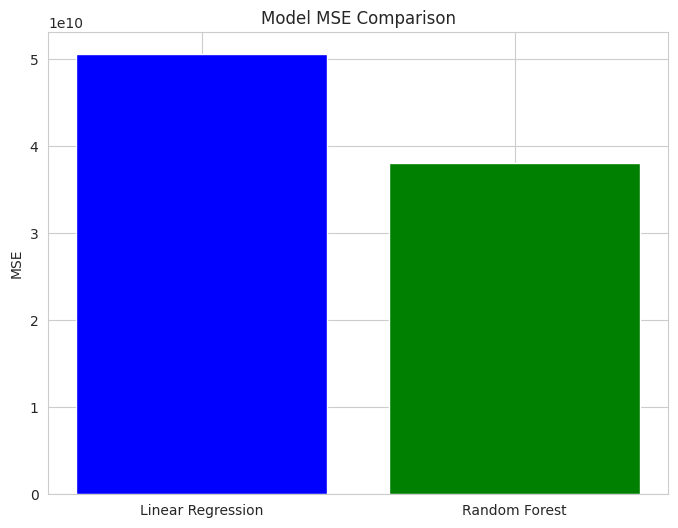

In [36]:
# Random Forest

rf = RandomForestRegressor(
    n_estimators=300,  # More trees
    max_depth=20,      # Limit depth
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf.fit(X_train, y_train)  # Note: X_train (NOT scaled)

y_pred_log_rf = rf.predict(X_test)

y_pred_rf = np.expm1(y_pred_log_rf)

# Evaluation
mse_rf = mean_squared_error(y_test_actual, y_pred_rf)
r2_rf = r2_score(y_test_actual, y_pred_rf)

print("\n--- Random Forest (Improved) ---")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.4f}")

# Comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test_actual,
    'Predicted': y_pred_rf,
    'Difference': y_test_actual - y_pred_rf
})

print(comparison_df.head())

# MSE Bar plot
models = ['Linear Regression', 'Random Forest']
mse_scores = [mse_linreg, mse_rf]

plt.figure(figsize=(8,6))
plt.bar(models, mse_scores, color=['blue', 'green'])
plt.title('Model MSE Comparison')
plt.ylabel('MSE')
plt.show()

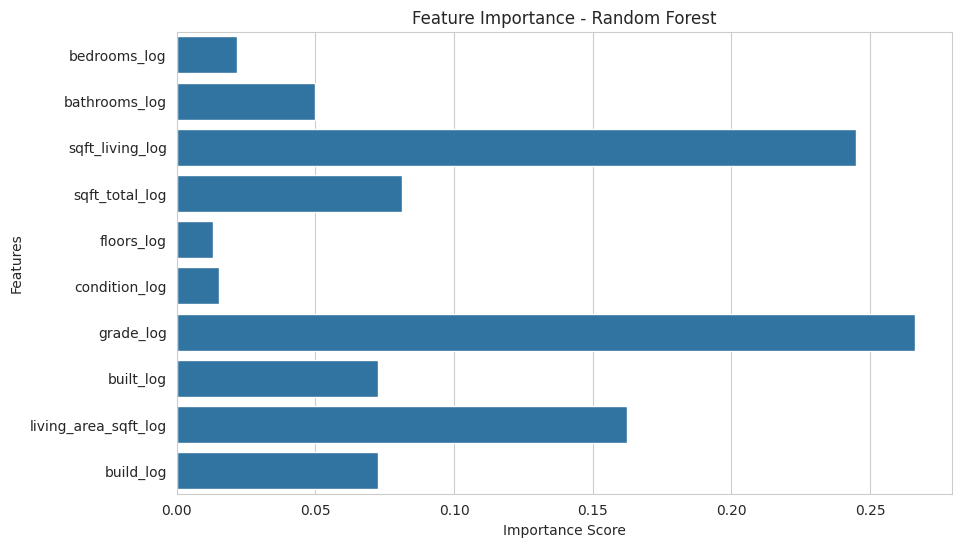

In [37]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [38]:
# Unknown data
unknown_data = {
    'bedrooms': [3, 4, 2, 5, 3],
    'bathrooms': [2, 3, 1, 4, 2],
    'sqft_living': [1500, 2500, 900, 3500, 1600],
    'sqft_total': [4000, 5000, 3000, 7000, 3800],
    'floors': [2, 2, 1, 2, 2],
    'condition': [4, 5, 3, 4, 4],
    'built': [1985, 2000, 1970, 2015, 1990],
    'living_area_sqft': [1200, 2100, 800, 2800, 1300],
    'grade': [7, 8, 6, 9, 7],
    'build': [1985, 2000, 1970, 2015, 1990]
}

unknown_df = pd.DataFrame(unknown_data)

# Apply log1p transformation for matching columns ---
unknown_df_log = pd.DataFrame()

features_to_log = ['bedrooms','bathrooms','sqft_living','sqft_total','floors','condition','grade','built','living_area_sqft','build']

for feature in features_to_log:
    unknown_df_log[feature + '_log'] = np.log1p(unknown_df[feature])

# --- 2. Scale the unknown data using the same scaler ---
unknown_scaled = scaler.transform(unknown_df_log)

# --- 3. Predict using the trained random forest model ---
y_pred_log_unknown = best_rf.predict(unknown_scaled)

# Reverse the log transformation to get original price
y_pred_unknown = np.expm1(y_pred_log_unknown)

# Combine the features with predicted price
result_df = unknown_df.copy()
result_df['Predicted_Price'] = y_pred_unknown
result_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,built,living_area_sqft,grade,build,Predicted_Price
0,3,2,1500,4000,2,4,1985,1200,7,1985,217729.706204
1,4,3,2500,5000,2,5,2000,2100,8,2000,280536.494659
2,2,1,900,3000,1,3,1970,800,6,1970,205305.064031
3,5,4,3500,7000,2,4,2015,2800,9,2015,306999.181059
4,3,2,1600,3800,2,4,1990,1300,7,1990,217729.706204
